# Step 2. Removing Noise
- Purpose: to remove background noise while maintaining the structure of the flagellum.

In [1]:
from __future__ import print_function
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def DisplayImageAsArray(image, title):
    array = sitk.GetArrayFromImage(image)
    plt.imshow(array, cmap='gray')
    plt.title(title)
    plt.show()
    return

## 2.1 Read the movie.

In [3]:
imread = sitk.ImageFileReader()
imread.SetFileName( '../Movie/movieCorrectedIllunimation.mha' )
movie = imread.Execute();

In [4]:
# Get the size of the movie.
(n1,n2,n3) = movie.GetSize()

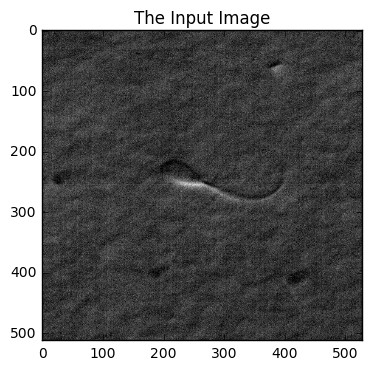

In [5]:
# Disply a frame as an example.
I = movie[:,:,10]
DisplayImageAsArray(I, "The Input Image")

## 2.3a Apply curvature flow filter to a frame.

In [6]:
def CurvatureFlow( image, iterations, timestep ):
    imcurvaflow = sitk.CurvatureFlowImageFilter()
    imcurvaflow.SetNumberOfIterations( iterations )
    imcurvaflow.SetTimeStep( timestep )
    return imcurvaflow.Execute( image )

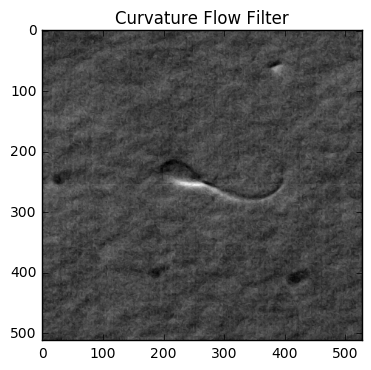

In [7]:
# Apply the filter to one frame.
img = CurvatureFlow( I, 10, 0.1 )
DisplayImageAsArray(img, "Curvature Flow Filter")

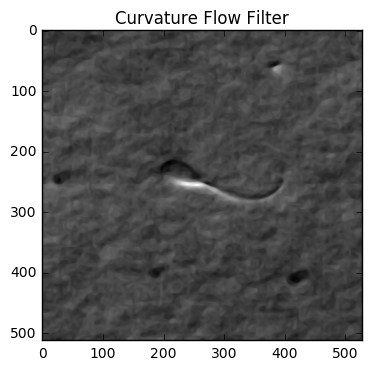

In [8]:
# Apply the filter to one frame.
img = CurvatureFlow( I, 50, 0.1 )
DisplayImageAsArray(img, "Curvature Flow Filter")

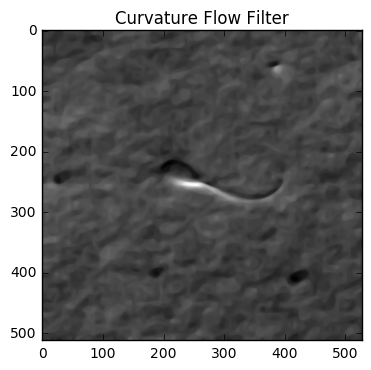

In [9]:
# Apply the filter to one frame.
img = CurvatureFlow( I, 50, 0.2 )
DisplayImageAsArray(img, "Curvature Flow Filter")

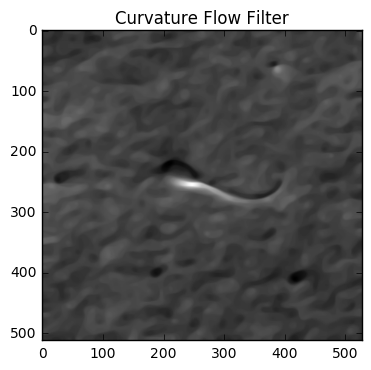

In [10]:
# Apply the filter to one frame.
img = CurvatureFlow( I, 50, 0.4 )
DisplayImageAsArray(img, "Curvature Flow Filter")

## 2.3b Apply curvature flow filter to the movie frame by frame.

In [11]:
newMovie = sitk.Image(n1,n2,n3, sitk.sitkFloat64)
iteration = 50
timestep = 0.2
for ii in range(n3):
    newImage = CurvatureFlow( movie[:,:,ii], iteration, timestep )
    volume = sitk.JoinSeries(newImage)
    newMovie = sitk.Paste(newMovie, volume, volume.GetSize(), destinationIndex=[0,0,ii])

## 2.4 Write out the result. 

In [12]:
imwrite = sitk.ImageFileWriter()
imwrite.SetFileName("movieBlurredCurvatureFlow.mha")
imwrite.Execute(newMovie)

<SimpleITK.SimpleITK.ImageFileWriter; proxy of <Swig Object of type 'itk::simple::ImageFileWriter *' at 0x11a68f3c0> >

### Choosing a blurring filter.
Apply median filter to the input movie to determine which blurring filter is better

## 2.3a Apply median filter to a frame.

In [13]:
def Median2D( image, radius ):
    medfilt2 = sitk.MedianImageFilter()
    medfilt2.SetRadius( radius )
    return medfilt2.Execute( image )

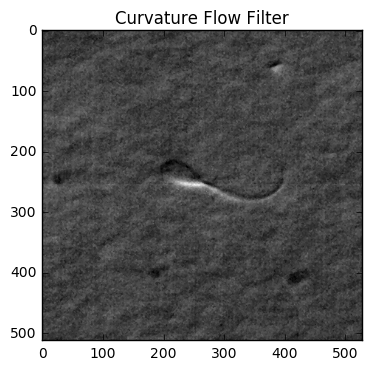

In [14]:
# Apply the filter to one frame.
img = Median2D( I, 1 )
DisplayImageAsArray(img, "Curvature Flow Filter")

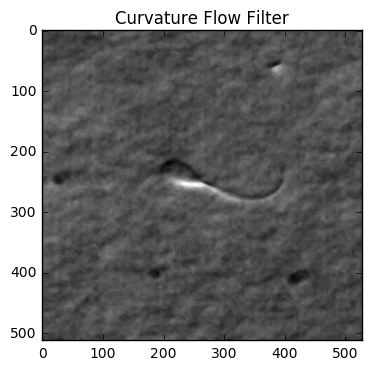

In [15]:
# Apply the filter to one frame.
img = Median2D( I, 3 )
DisplayImageAsArray(img, "Curvature Flow Filter")

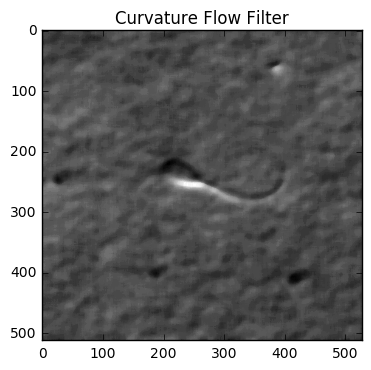

In [16]:
# Apply the filter to one frame.
img = Median2D( I, 5 )
DisplayImageAsArray(img, "Curvature Flow Filter")

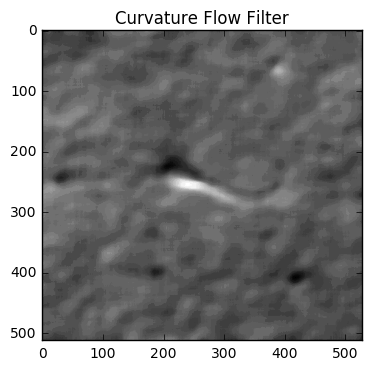

In [17]:
# Apply the filter to one frame.
img = Median2D( I, 10 )
DisplayImageAsArray(img, "Curvature Flow Filter")

## 2.3b Apply median filter to the movie frame by frame.

In [18]:
newMovie = sitk.Image(n1,n2,n3, sitk.sitkUInt16)
radius = 3
for ii in range(n3):
    newImage = Median2D( movie[:,:,ii], radius )
    volume = sitk.JoinSeries(newImage)
    newMovie = sitk.Paste(newMovie, volume, volume.GetSize(), destinationIndex=[0,0,ii])

## 2.4 Write out the result. 

In [19]:
imwrite = sitk.ImageFileWriter()
imwrite.SetFileName("movieBlurredMedian.mha")
imwrite.Execute(newMovie)

<SimpleITK.SimpleITK.ImageFileWriter; proxy of <Swig Object of type 'itk::simple::ImageFileWriter *' at 0x11a68f3f0> >

## 2.5 Conclusion.
- So far, it is not clear which blurring filter is better.
- Since the background noise is strong, we need to set the parameters big for either filter to remove as much noise as possible.
- On the other hand, the flagellum is very thin, the parameters for either filter cannot be set to big in order to keep the feature of the sperm.
- Solution: is there a "local" blurring method, which is analogous to block thresholding?